In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import datetime 
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import r2_score

In [8]:
desks = pd.read_csv("desks.csv")

desks.head()

,id,building,floor,orientation,deskNo
0,127,A,1,NE,20
1,128,A,1,NE,19
2,129,A,1,NE,17
3,130,A,1,NE,18
4,131,A,1,NE,16


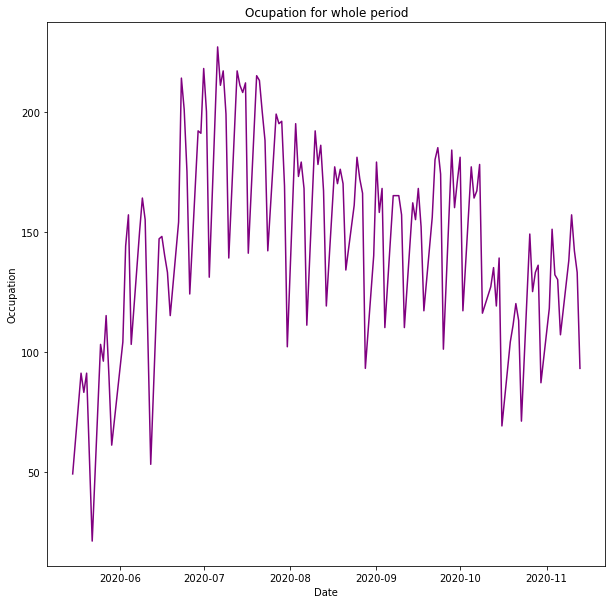

In [9]:
deskusage=pd.read_csv("export_deskusage.csv")
deskusage.head()

dfu=pd.DataFrame(deskusage)

dfu['usageBegin']=pd.to_datetime(dfu.usageBegin)
dfu['usageEnd']=pd.to_datetime(dfu.usageEnd)
dfu['weekday']= pd.to_datetime(dfu['usageBegin']).dt.dayofweek

dfu=dfu.drop(['lastScan','lastUpdate'], axis=1)
dfu = dfu[~dfu["deskNo"].isin([98,99,198,198,298,398,399,498,499,598,599])]
dfu = dfu[~dfu["weekday"].isin([5,6])]

duration=dfu['duration']=(dfu['usageEnd']-dfu['usageBegin'])

dfu=dfu.loc[dfu['duration']>pd.Timedelta(3, unit='h')]

dfu['dateBegin']=pd.to_datetime(dfu.usageBegin).dt.date
dfu['timeBegin']=pd.to_datetime(dfu.usageBegin).dt.time

#df['days'] = float(df['delta'].dt.days)


#dfu['weekday'].value_counts()
#
dfu['one']=1

#df = dfu.groupby('floor', 'dateBegin', 'building')['floor', 'dateBegin', 'building'].transform('count')

gruppiert= dfu.groupby(['dateBegin', 'building']).count()['one'].to_frame('count').reset_index()

gruppiert = gruppiert.iloc[:-4]



gruppiertdatum=dfu.groupby(['dateBegin']).count()['one'].to_frame('count').reset_index()
gruppiertdatum = gruppiertdatum.iloc[:-2]

gruppiert['weekday']= pd.to_datetime(gruppiert['dateBegin']).dt.dayofweek




#print(gruppiert.head()) 
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

#plotdf = gruppiertdatum.loc[gruppiertdatum['dateBegin']>'2020-07-01' and gruppiertdatum['dateBegin']<'2020-07-30']
#gruppiertdatum['dateBegin']=pd.to_datetime(gruppiertdatum.dateBegin)
#plotdf = gruppiertdatum[(gruppiertdatum['dateBegin'].Timestamp >= '2020-07-01') 
#& (gruppiertdatum['dateBegin'].Timestamp <= '2020-08-01')]
#print(gruppiertdatum['dateBegin'].dtypes)


# Add x-axis and y-axis
ax.plot('dateBegin',
        'count',
        color='purple', data=gruppiertdatum)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Occupation",
       title="Ocupation for whole period")

plt.show()


gruppiertdatum['dateBegin'] = gruppiertdatum['dateBegin'].astype(str)

gruppiertdatum['dateBegin'] = (gruppiertdatum['dateBegin'].str.split()).apply(lambda x: float(x[0].replace('-', '')))

#gruppiertdatum['dateBegin'] = gruppiertdatum['dateBegin'].dt.strftime("%Y-%m-%d")

gruppiertdatum.to_csv('gruppiertdatum3.csv')


gruppiert['dateBegin'] = gruppiert['dateBegin'].astype(str)

gruppiert['dateBegin1'] = (gruppiert['dateBegin'].str.split()).apply(lambda x: float(x[0].replace('-', '')))

#gruppiertdatum['dateBegin'] = gruppiertdatum['dateBegin'].values.astype(np.float) / 10**9



In [10]:
dfA = gruppiert[(gruppiert.building == "A")]
dfA["Anteil"]=round(dfA["count"] /148*100)
dfA[['dateBegin1','Anteil']].to_csv('BuildingA1.csv')   
dfB = gruppiert[(gruppiert.building == "B")] 
dfB["Anteil"]=round(gruppiert["count"] /308*100)
dfB[['dateBegin1','Anteil']].to_csv('BuildingB1.csv')   


<ipython-input-10-ee978386600d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA["Anteil"]=round(dfA["count"] /148*100)
<ipython-input-10-ee978386600d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB["Anteil"]=round(gruppiert["count"] /308*100)


>expected=43.0, predicted=33.5
>expected=40.0, predicted=40.8
>expected=36.0, predicted=38.1
>expected=44.0, predicted=37.8
>expected=32.0, predicted=30.3
>expected=30.0, predicted=35.2
>expected=31.0, predicted=36.8
>expected=32.0, predicted=32.8
>expected=31.0, predicted=34.7
>expected=22.0, predicted=30.2
>expected=32.0, predicted=29.4
>expected=39.0, predicted=32.0
>expected=42.0, predicted=34.1
>expected=37.0, predicted=32.8
>expected=22.0, predicted=30.8
>expected=35.0, predicted=35.4
>expected=43.0, predicted=37.9
>expected=40.0, predicted=39.7
>expected=41.0, predicted=33.6
>expected=32.0, predicted=29.8
>expected=33.0, predicted=39.0
>expected=41.0, predicted=41.2
>expected=40.0, predicted=41.2
>expected=39.0, predicted=40.6
>expected=30.0, predicted=31.0
>expected=34.0, predicted=36.8
>expected=43.0, predicted=39.4
>expected=41.0, predicted=36.9
>expected=42.0, predicted=39.6
>expected=31.0, predicted=29.7
r2 0.3732403378551318
MAE: 3.801


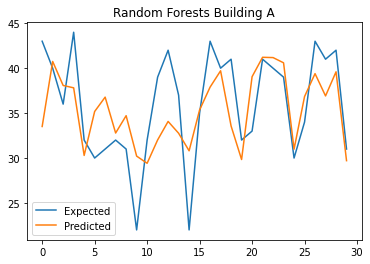

In [11]:
# forecast monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# load the dataset
series = read_csv('BuildingA1.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=40)
# evaluate
mae, y, yhat = walk_forward_validation(data, 30)


r2 = r2_score(y, np.round(yhat)) 
print("r2",r2) 
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.title("Random Forests Building A")
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()



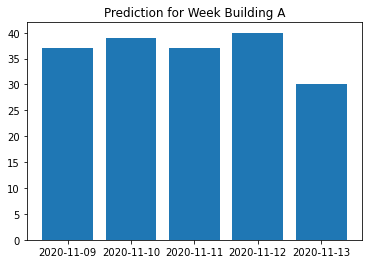

In [12]:
df2A = pd.DataFrame(columns=['Date', 'Prediction'])

df2A['Date']=dfA['dateBegin'].iloc[-5:]
df2A['Prediction']=np.round(yhat[-5:])


pyplot.title("Prediction for Week Building A")
pyplot.bar(df2A['Date'], df2A['Prediction'])
pyplot.show()

df2A[['Date','Prediction']].to_csv('WeekPredictionA.csv')  

>expected=37.0, predicted=34.9
>expected=34.0, predicted=35.2
>expected=37.0, predicted=36.1
>expected=37.0, predicted=36.3
>expected=22.0, predicted=22.7
>expected=27.0, predicted=27.7
>expected=29.0, predicted=35.9
>expected=23.0, predicted=35.6
>expected=30.0, predicted=29.0
>expected=12.0, predicted=22.3
>expected=19.0, predicted=29.5
>expected=18.0, predicted=22.0
>expected=19.0, predicted=22.7
>expected=19.0, predicted=24.8
>expected=12.0, predicted=18.8
>expected=31.0, predicted=19.6
>expected=20.0, predicted=22.2
>expected=24.0, predicted=19.8
>expected=24.0, predicted=19.7
>expected=13.0, predicted=18.8
>expected=22.0, predicted=25.5
>expected=29.0, predicted=20.6
>expected=24.0, predicted=21.8
>expected=24.0, predicted=22.9
>expected=20.0, predicted=15.9
>expected=28.0, predicted=25.5
>expected=31.0, predicted=22.0
>expected=26.0, predicted=22.8
>expected=23.0, predicted=26.5
>expected=15.0, predicted=19.3
<class 'list'>
r2 0.3213723207560092
MAE: 4.587


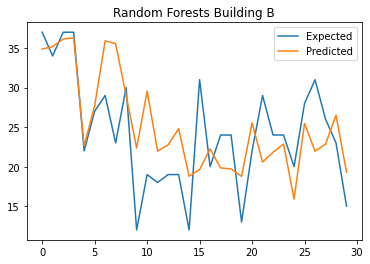

In [13]:
series = read_csv('BuildingB1.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=40)
# evaluate
mae, y, yhatB = walk_forward_validation(data, 30)

print(type(yhat))
r2 = r2_score(y, np.round(yhatB)) 
print("r2",r2)  
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.title("Random Forests Building B")
pyplot.plot(y, label='Expected')
pyplot.plot(yhatB, label='Predicted')
pyplot.legend()
pyplot.show()


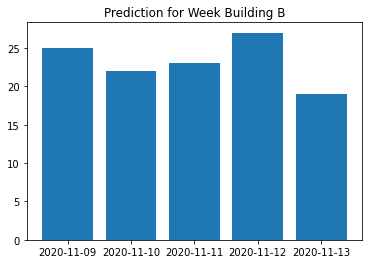

In [14]:

df2B = pd.DataFrame(columns=['Date', 'Prediction'])

df2B['Date']=dfB['dateBegin'].iloc[-5:]
df2B['Prediction']=np.round(yhatB[-5:])

pyplot.title("Prediction for Week Building B")
pyplot.bar(df2B['Date'], df2B['Prediction'])
pyplot.show()

df2B[['Date','Prediction']].to_csv('WeekPredictionB.csv')  

In [54]:
#liste für künftige daten 
#from datetime import date, timedelta
#i=0
#dt=[]
#dt[0]=dt.append(date.today())
#while i < 5: 
 #   dt[i] = dt[i] + timedelta(i)

#print('Current Date :',date.today())
#print('5 days before Current Date :',dt)





TypeError: unsupported operand type(s) for +: 'NoneType' and 'datetime.timedelta'

In [15]:
series = read_csv('gruppiertdatum.csv', header=0, index_col=0)
values = series.values
type(series)

pandas.core.frame.DataFrame

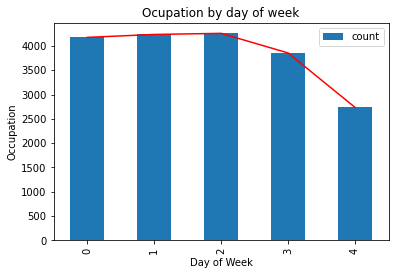

In [16]:
gruppiertweekday=dfu.groupby(['weekday']).count()['one'].to_frame('count').reset_index()

#fig, ax = plt.subplots(figsize=(10, 10))

ax = gruppiertweekday.plot.bar('weekday', 'count')
ax.plot('weekday',
        'count',
        color='red', data=gruppiertweekday)

# Set title and labels for axes
ax.set(xlabel="Day of Week",
       ylabel="Occupation",
       title="Ocupation by day of week")

plt.show()


In [17]:

gruppiertdatum.sort_values(by='count', ascending=True)

,dateBegin,count
4,20200522.0,21
0,20200515.0,49
17,20200612.0,53
9,20200529.0,61
107,20201016.0,69
...,...,...
43,20200720.0,215
35,20200708.0,217
38,20200713.0,217
30,20200701.0,218


In [19]:

#str(gruppiertdatum['dateBegin'].dt.month)+"/"+str(gruppiertdatum['dateBegin'].dt.day)+"/"+str(gruppiertdatum['dateBegin'].dt.year)

#date_object = datetime.strptime(date_string, "%d %B, %Y")

gruppiertdatum.dtypes

print("Mean = ",gruppiertdatum['count'].mean())


Mean =  149.2421875


In [20]:

# stationäre Zeitreihe eine ist, deren Mittelwert und Varianz über die Zeit konstant ist. 

############### checking for stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)





In [21]:
#p-value should be <0.05

ad_test(gruppiertdatum['count'])

1. ADF :  -2.2110451889720815
2. P-Value :  0.20226114161246594
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 114
5. Critical Values :
	 1% :  -3.489057523907491
	 5% :  -2.887246327182993
	 10% :  -2.5804808802708528


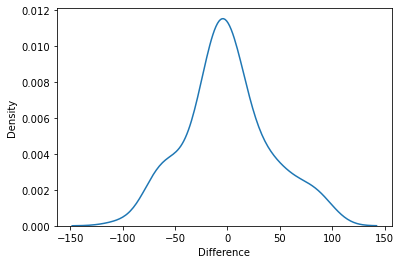

Mean =  0.015873015873015872
Std =  40.43483332513869


In [32]:
gruppiertdatum['Difference'] = gruppiertdatum['count'] - gruppiertdatum['count'].shift(1)

#todo: hist und distr linie auf einer Grafik abbilden

gruppiertdatum=gruppiertdatum.dropna()

sns.kdeplot(data=gruppiertdatum, x ='Difference')
#plt.hist(gruppiertdatum['Difference'])
plt.show()

print("Mean = ",gruppiertdatum['Difference'].mean())
print("Std = ",gruppiertdatum['Difference'].std())

In [23]:

ad_test(gruppiertdatum['Difference'])



1. ADF :  -2.4799357108119495
2. P-Value :  0.12043281645889814
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 114
5. Critical Values :
	 1% :  -3.489057523907491
	 5% :  -2.887246327182993
	 10% :  -2.5804808802708528


In [24]:
#parametern wählen

from pmdarima import auto_arima

stepwise_fit = auto_arima(gruppiertdatum['Difference'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1227.056, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1303.198, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1281.162, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1245.865, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1301.208, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1245.679, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1201.658, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1235.204, Time=0.08 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=1176.391, Time=0.19 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1178.355, Time=0.17 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=1171.396, Time=0.19 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1171.985, Time=0.18 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=1171.228, Time=0.27 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : 

In [25]:
#split dataset
 
print(gruppiertdatum.shape)
train=gruppiertdatum.iloc[:-20]
test=gruppiertdatum.iloc[-20:]
print(train.shape,test.shape)



(127, 3)
(107, 3) (20, 3)


/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index w

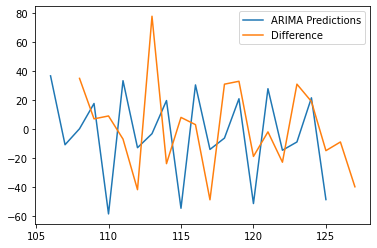

In [31]:

#p is the number of autoregressive terms,
#d is the number of nonseasonal differences needed for stationarity, and
#q is the number of lagged forecast errors in the prediction equation.


from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Difference'],order=(4,1,5)) 
model=model.fit()
model.summary()


start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Difference'].plot(legend=True)

print("r2: ",r2_score(test['Difference'], pred))

In [27]:

print("Mean prdicted: ", pred.mean())
print("Mean test difference: ", test['Difference'].mean())
print("Mean train difference: ", train['Difference'].mean())



Mean prdicted:  -3.850262354310904
Mean test difference:  1.2
Mean train difference:  0.18691588785046728


In [28]:
print("Std prdicted: ", pred.std())
print("Std test difference: ", test['Difference'].std())
print("Std train difference: ", train['Difference'].std())


Std prdicted:  30.629478532908166
Std test difference:  31.157663583779836
Std train difference:  42.075657561902034


In [18]:
dfu

,deskId,building,floor,orientation,deskNo,usageBegin,usageEnd,weekday,duration,dateBegin,timeBegin,one
0,138,A,1,NE,8,2020-05-15 05:14:33.590,2020-05-15 14:01:56.180,4,0 days 08:47:22.590000,2020-05-15,05:14:33.590000,1
1,246,A,1,SW,15,2020-05-15 06:12:46.480,2020-05-15 14:46:23.080,4,0 days 08:33:36.600000,2020-05-15,06:12:46.480000,1
2,142,A,1,NE,4,2020-05-15 06:25:42.107,2020-05-15 10:36:14.703,4,0 days 04:10:32.596000,2020-05-15,06:25:42.107000,1
3,151,A,1,SE,37,2020-05-15 06:36:07.877,2020-05-15 12:59:45.413,4,0 days 06:23:37.536000,2020-05-15,06:36:07.877000,1
4,149,A,1,SE,39,2020-05-15 06:43:21.603,2020-05-15 14:29:41.640,4,0 days 07:46:20.037000,2020-05-15,06:43:21.603000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23712,529,B,5,SE,17,2020-11-17 08:15:00.633,2020-11-17 14:23:12.460,1,0 days 06:08:11.827000,2020-11-17,08:15:00.633000,1
23715,563,B,2,NE,20,2020-11-17 08:34:49.743,2020-11-17 14:27:52.263,1,0 days 05:53:02.520000,2020-11-17,08:34:49.743000,1
23720,169,A,1,SE,4,2020-11-17 09:20:08.327,2020-11-17 14:58:54.107,1,0 days 05:38:45.780000,2020-11-17,09:20:08.327000,1
23722,158,A,1,SE,18,2020-11-17 09:23:05.670,2020-11-17 12:43:04.057,1,0 days 03:19:58.387000,2020-11-17,09:23:05.670000,1


In [151]:
#dfu = dfu.drop(dfu.loc['duration']<pd.Timedelta(3, unit='h').index, inplace=True)

#df = df.drop(df.loc[i,'time']<df.loc[i-1,'time'].index)
#duration=dfu['duration']=(dfu['usageEnd']-dfu['usageBegin']).astype('timedelta64[D]')


#dfu['durationDays']=pd.to_datetime(dfu.duration).dt.day


#more=dfu.loc[dfu['duration']>0.0]

#dfu=dfu.loc[dfu['duration']>pd.Timedelta(1, unit='d')]


#for index, row in more.head().iterrows():
     # access data using column names
     #count
     #row['dateBegin']+=1
    #print(index, row['deskNo'], row['orientation'], row['floor'], row['building'], row['dateBegin'], row['duration'])

<function matplotlib.pyplot.show(close=None, block=None)>

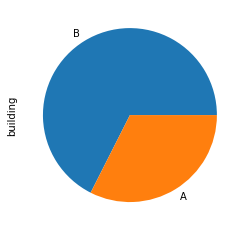

In [15]:

desks.building.value_counts(normalize=True)
desks.building.value_counts(normalize=True).plot.pie()
plt.show

In [18]:
df=pd.DataFrame(desks)

df['building'].value_counts()
#df['floor'].value_counts()
#A=df[df.building=="A"]
#A['floor'].value_counts()

B    308
A    148
Name: building, dtype: int64